In [24]:
# Author: Hassan Ali
# Import libraries
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.cluster import KMeans  # KMeans: From scikit-learn, a clustering method for partitioning a data set into a set of groups.

# declaring the CSV file dataset 
# 'pd.read_csv' is used to load data from a CSV file into a Pandas DataFrame. Here, the 'iris.csv' file is expected to be in the same directory.
# 'index_col' specifies the column to use as the row labels of the DataFrame. In this case, 'Id' column is used.
df = pd.read_csv('iris.csv', index_col='Id')

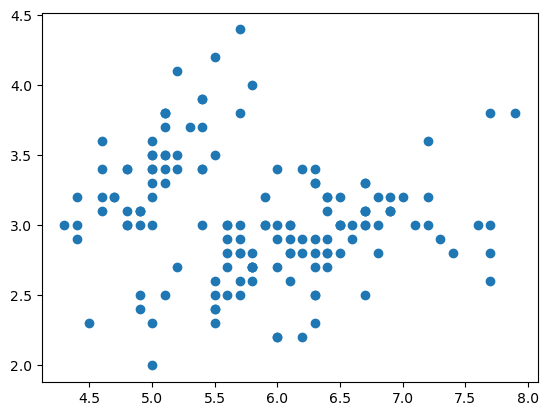

In [25]:
# Selecting features for clustering
# 'i_df.iloc[:, [0, 1]]' is used to select a subset of the DataFrame's rows and columns.
# 'iloc' is used for integer-location based indexing, allowing selection by position.
# '[:, [0, 1]]' specifies that all rows are selected (:) and only the columns at positions 0 and 1 are selected ([0, 1]).
# Selecting the first two features of  Iris dataset for clustering.
X = df.iloc[:, [0, 1]]
# Extracting the first column of i_df and assigning it to x. This column could represent any numerical feature.
x = df.iloc[:, 0]
# Extracting the second column of i_df and assigning it to y. This column could also represent any numerical feature.
y = df.iloc[:, 1]

# Plotting a scatter plot of x and y to visualize the distribution of data points.
# This visualization helps in understanding the spread and grouping (if any) of the data points before applying clustering.
plt.scatter(x, y)

In [32]:
# Initializing the KMeans clustering algorithm with specific parameters:
# n_clusters=3: This indicates the number of clusters to form as well as the number of centroids to generate.
#               We are aiming to partition the data into 3 distinct groups.
# random_state=4: Ensures reproducibility of the results by using the same seed for initializing the centroids.
#                 This makes the algorithm's outputs consistent across different runs.
# n_init=10: Specifies that the k-means algorithm will run 10 times with different centroid seeds.
#            The best output in terms of inertia (within-cluster sum-of-squares) from these runs will be chosen.
#            This approach helps in achieving more robust results by mitigating the impact of initial centroid selection.
kmeans = KMeans(n_clusters=5, random_state=4, n_init=10)

In [33]:
# Predict the clusters
# Applying K-Means clustering to dataset `X`
y_kmeans = kmeans.fit_predict(X)  # Fit the K-Means model to the data `X` and predict the cluster for each data point. The resulting array `y_kmeans` contains the cluster indices assigned to each sample in `X`.

centroids = kmeans.cluster_centers_  # Extract the coordinates of the cluster centers (centroids) after the model has been fitted. This will give us the `centroids` of the clusters formed by K-Means, useful for analyzing the positioning of clusters in the feature space.

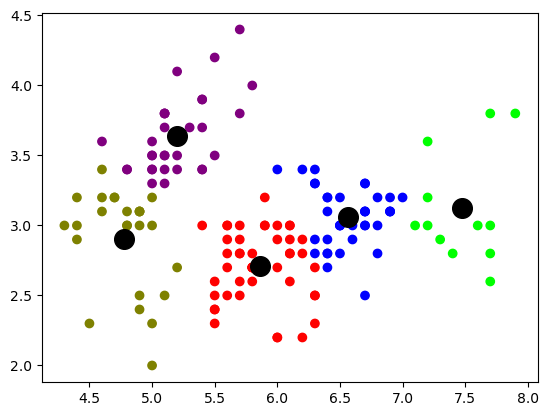

In [34]:
# The first line creates a scatter plot of the two-dimensional data points. Each point is colored
# according to its cluster label assigned by the k-means clustering algorithm. The `X.iloc[:, 0]`
# and `X.iloc[:, 1]` are slicing operations that select all rows of the first and second columns
# of the DataFrame `X`, respectively, which represent the coordinates of data points in a 2D space.
# The `c=kmeans.labels_` assigns a color to each point based on its cluster label, and `cmap='brg'`
# specifies the colormap (blue-red-green) to use for coloring the different clusters.
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='brg')

# The second line plots the centroids of the clusters determined by the k-means algorithm. 
# `kmeans.cluster_centers_[:, 0]` and `kmeans.cluster_centers_[:, 1]` extract the x and y coordinates
# of the centroids, respectively. The centroids are plotted as large black dots (`c='black'`) with 
# a size of 200 (`s=200`), making them easily distinguishable from the data points. This visualization 
# helps in understanding the center of each cluster around which the data points are grouped.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')